### Set Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# usefull feature to make it easier to analize data in future
# pd.set_option('display.max_rows', 200)
# plt.rcParams['figure.figsize'] = [12, 8]

### Load data

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.set_index('id', inplace=True)
df.age = df.age.astype(int)

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


### Basic data analysis

<AxesSubplot:ylabel='stroke'>

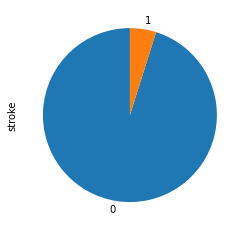

In [4]:
df['stroke'].value_counts().plot.pie(startangle=90)

### Data is clearly imbalanced - will need over sampling

Before we begin lets find out what is up with gender types in this data set:

In [5]:
print(df['gender'].value_counts()) # tells us there is only one data point with 'Other' as gender

# We can drop one point of data where 'gender' == 'Other' for simplicity

df = df.drop(df[ df['gender'] == 'Other' ].index)

now lets see how is gender distributed:

<AxesSubplot:ylabel='gender'>

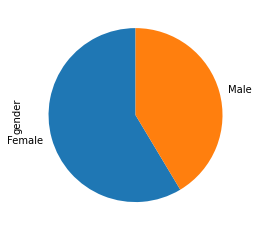

In [6]:
df['gender'].value_counts().plot.pie(startangle=90)

More less the same number of both genders

<AxesSubplot:xlabel='age', ylabel='bmi'>

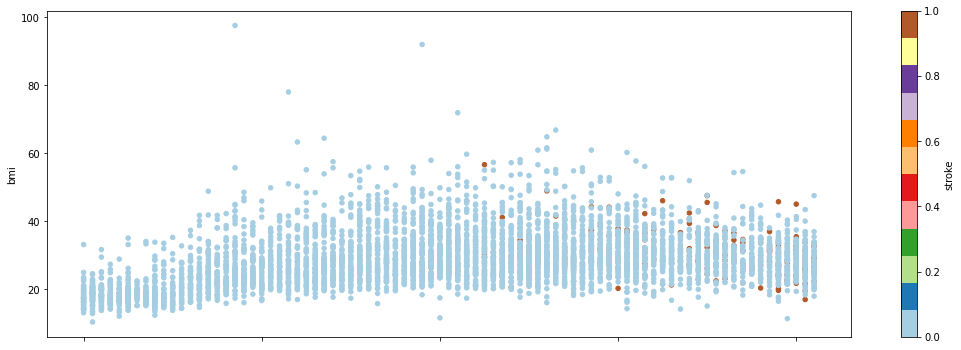

In [7]:
plt.rcParams['figure.figsize'] = [18,6]
df.plot.scatter(x='age', y='bmi', c='stroke', cmap='Paired')

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

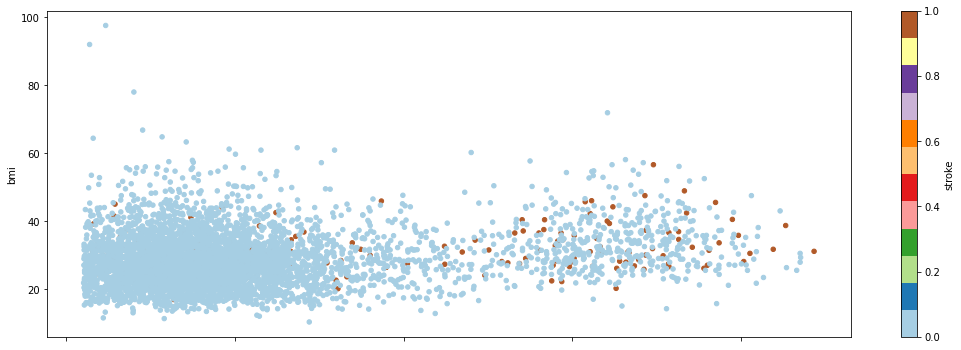

In [8]:
df.plot.scatter(x='avg_glucose_level', y='bmi', c='stroke', cmap='Paired')

Strokes are spread across lower BMI and higher glucose level and age

<AxesSubplot:ylabel='Frequency'>

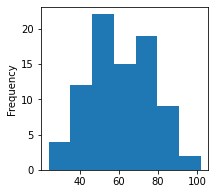

In [9]:
plt.rcParams['figure.figsize'] = [3,3]
df['age'].value_counts().sort_index().plot.hist(bins=7)

Age is equally distibuted

array([<AxesSubplot:title={'center':'Female'}, xlabel='age'>,
       <AxesSubplot:title={'center':'Male'}, xlabel='age'>], dtype=object)

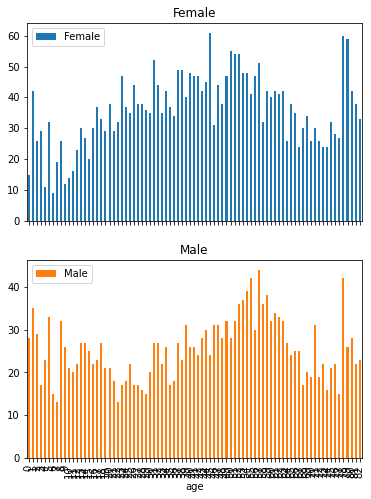

In [10]:
plt.rcParams['figure.figsize'] = [6,8]
pd.crosstab(df.age, df.gender).plot.bar(subplots=True)

Across genders age is evenly distributed

In [11]:
positive_by_gender = df.groupby(['stroke','gender'])['age'].value_counts().loc[1, :].unstack().T[1].sort_index()

In [12]:
age = positive_by_gender.index
n_females = positive_by_gender.Female
n_males = positive_by_gender.Male
mean_females = (age*n_females).sum()/(n_females.sum())
mean_males = (age*n_males).sum()/(n_males.sum())
round(mean_females, 2), mean_males

(67.13, 68.5)

<AxesSubplot:xlabel='age'>

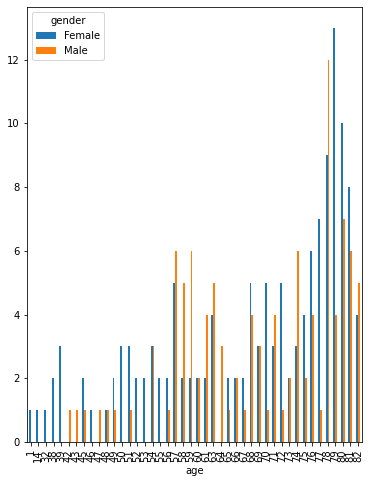

In [13]:
positive_by_gender.plot.bar()

<AxesSubplot:ylabel='work_type'>

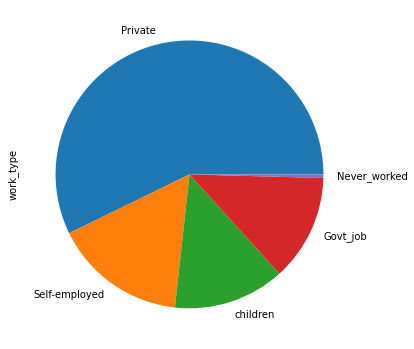

In [14]:
df['work_type'].value_counts().plot.pie()

array([<AxesSubplot:title={'center':'Govt_job'}, xlabel='age'>,
       <AxesSubplot:title={'center':'Never_worked'}, xlabel='age'>,
       <AxesSubplot:title={'center':'Private'}, xlabel='age'>,
       <AxesSubplot:title={'center':'Self-employed'}, xlabel='age'>,
       <AxesSubplot:title={'center':'children'}, xlabel='age'>],
      dtype=object)

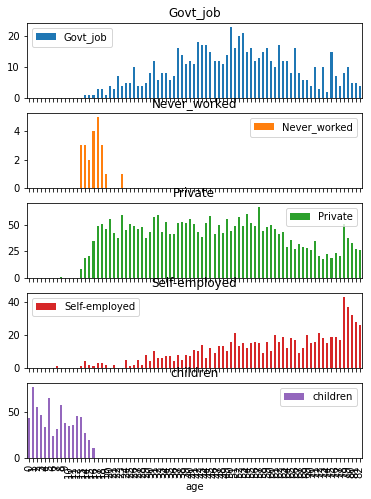

In [15]:
pd.crosstab(df.age, df.work_type).plot.bar(subplots=True)

array([<AxesSubplot:title={'center':'Unknown'}, xlabel='age'>,
       <AxesSubplot:title={'center':'formerly smoked'}, xlabel='age'>,
       <AxesSubplot:title={'center':'never smoked'}, xlabel='age'>,
       <AxesSubplot:title={'center':'smokes'}, xlabel='age'>],
      dtype=object)

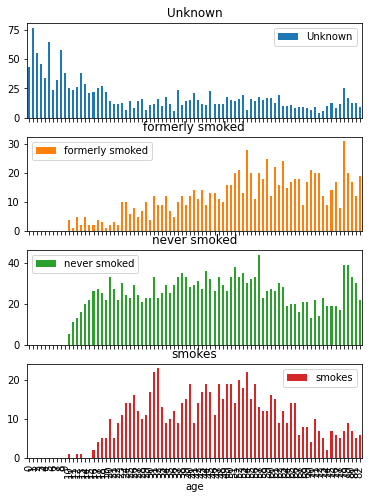

In [16]:
pd.crosstab(df.age, df.smoking_status).plot.bar(subplots=True)

from this we see that unknown smoking status is bound to be 'never smoked' because of age majoryty of data points are in

### Basic data cleaning

In [17]:
df['ever_married'] = df['ever_married'] == 'Yes'
df['male'] = df['gender'] == 'Male'
df['lives_in_city'] = df['Residence_type'] == 'Urban'
df.drop(columns=['Residence_type', 'gender'], inplace=True)
df['work_type'] = df['work_type'].replace({'Govt_job':0, 'Private':1,'Self-employed':2,'children':-1,'Never_worked':-2}).astype(float)
df['smoking_status'] = df['smoking_status'].replace( { 'formerly smoked':1, 'smokes':2, 'never smoked':0, 'Unknown': 0 } ).astype(float)

df

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,male,lives_in_city
id,,,,,,,,,,,
9046,67,0,1,True,1.0,228.69,36.6,1.0,1,True,True
51676,61,0,0,True,2.0,202.21,NaN,0.0,1,False,False
31112,80,0,1,True,1.0,105.92,32.5,0.0,1,True,False
60182,49,0,0,True,1.0,171.23,34.4,2.0,1,False,True
1665,79,1,0,True,2.0,174.12,24.0,0.0,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...
18234,80,1,0,True,1.0,83.75,NaN,0.0,0,False,True
44873,81,0,0,True,2.0,125.20,40.0,0.0,0,False,True
19723,35,0,0,True,2.0,82.99,30.6,0.0,0,False,False


In [18]:
df.isna().sum()

age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
male                   0
lives_in_city          0
dtype: int64

We could find median or mean value of bmi and set it as all unknown values or even drop all row where bmi is NaN but there is a way where we can make prediction about BMI and set NaN value to predcted value. original code for that found on https://www.kaggle.com/thomaskonstantin/analyzing-and-modeling-stroke-data

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

DT_bmi_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = df[['age','male','bmi']].copy()

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','male']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

df

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,male,lives_in_city
id,,,,,,,,,,,
9046,67,0,1,True,1.0,228.69,36.600000,1.0,1,True,True
51676,61,0,0,True,2.0,202.21,29.879487,0.0,1,False,False
31112,80,0,1,True,1.0,105.92,32.500000,0.0,1,True,False
60182,49,0,0,True,1.0,171.23,34.400000,2.0,1,False,True
1665,79,1,0,True,2.0,174.12,24.000000,0.0,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...
18234,80,1,0,True,1.0,83.75,28.476923,0.0,0,False,True
44873,81,0,0,True,2.0,125.20,40.000000,0.0,0,False,True
19723,35,0,0,True,2.0,82.99,30.600000,0.0,0,False,False


In [20]:
df.isna().sum()

age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
male                 0
lives_in_city        0
dtype: int64

Awesome, so we do no have the NaN data any more

Further data analysis:

In [21]:
df.corr()['stroke'].sort_values(ascending=False)[1:]*100

age                  24.510949
heart_disease        13.490484
avg_glucose_level    13.199119
hypertension         12.789126
ever_married         10.829932
work_type             9.159228
bmi                   4.142382
smoking_status        4.136561
lives_in_city         1.541458
male                  0.908060
Name: stroke, dtype: float64

<AxesSubplot:>

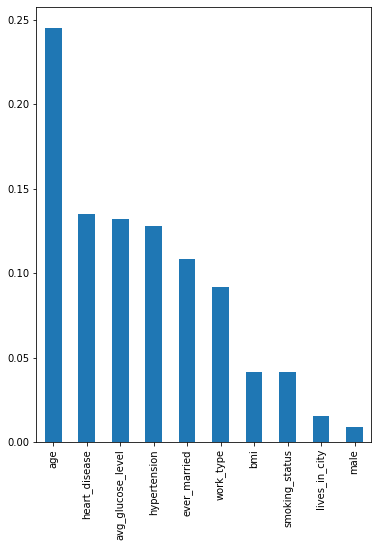

In [22]:
df.corr()['stroke'].sort_values(ascending=False)[1:].plot.bar()

In [23]:
df.corr()['age'].loc[['work_type', 'ever_married']]*100

work_type       58.639461
ever_married    67.914078
Name: age, dtype: float64

# Summary:

#### From this research we can tell:
1. Most important features are: age, heart diseases, glucose in blood and hypertention where age is the most important
2. Least important features are: lives_in_city, male
3. Work type in this data sheet work_type and ever_married features are relevant but strongly correlated with age where age is far more important so we can drop it without much loss in accuracy

#### Based on that we can create new data set:

In [25]:
df = df.loc[:, ['age', 'heart_disease', 'avg_glucose_level', 'hypertension', 'bmi', 'smoking_status', 'stroke']]

Before we save this dataset to file we have to ovesample stroke positive points and we will use SMOTE technike to do that

Before SMOTE data set looks looks like this:

Counter({0: 4860, 1: 249})


<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

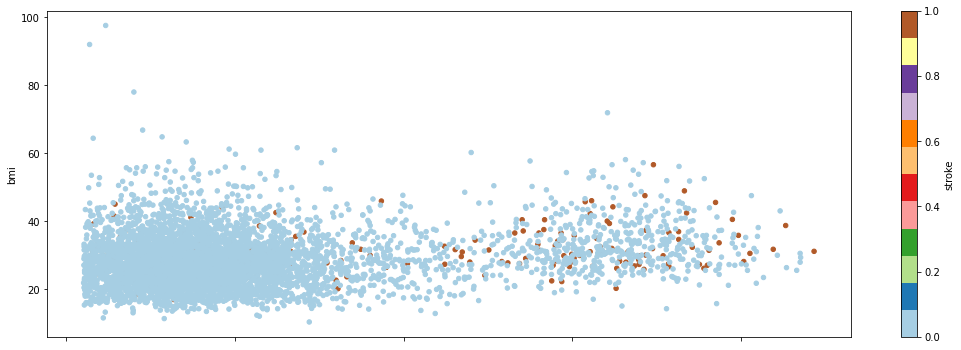

In [26]:
from collections import Counter

plt.rcParams['figure.figsize'] = [18,6]

counter = Counter(df['stroke'])
print(counter)

df.plot.scatter(x='avg_glucose_level', y='bmi', c='stroke', cmap='Paired')

After implementing SMOTE we get data like this:

Counter({1: 4860, 0: 4860})


<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

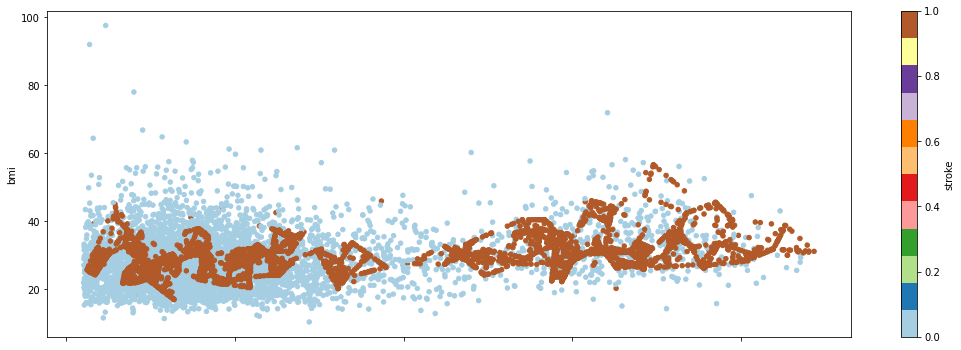

In [27]:
from imblearn.over_sampling import BorderlineSMOTE

X = df.loc[:, df.columns!='stroke']
y = df['stroke']

oversampler = BorderlineSMOTE()

X,y = oversampler.fit_resample(X,y)

counter = Counter(y)
print(counter)

X['stroke'] = y
df = X

df.plot.scatter(x='avg_glucose_level', y='bmi', c='stroke', cmap='Paired')

Now lets save this dataset to new file so that we do not mess with original data

In [28]:
df.to_csv('Dataset_ready_to_train_AI.csv', index=False)